# Subject Conversion data work with `pandas`

This is a notebook to work with our subject reconciliation data and start to analyze it a bit. Maybe clean it in certain ways, too.


In [30]:
import pandas as pd

## Starting off the csv way
(Hey, it's what I know best! We can try to replicate in Excel next)  
After we get pandas set up, let's first see if the data is ready:

In [31]:
!head subject_conversion.csv

Status,old_ARK,old_predicate,new_predicate,predicate match,new_role,old_label,updated_label,current DAMS_Label is correct,Action,ARK action,Label action,Note,clustering id,FAST_Label_Match_Updated_DAMS_Label,FAST_Label,FAST_URI,LC_Label_Match_Updated_DAMS_Label,LoC_Label,LoC_URI,AAT_Label_Match,AAT_Label,AAT_URI,VIAF_Label_Match,VIAF_Label,VIAF_URI,MARC_tag,Sample_Object_ARK,Object_Counts,Parts,Part_order,DAMS_ARK_Part_order,sort,source,simple or complex,jj,wikipedia_link,ll,mm
split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,Geographic,False,,"Rancho San Regis (Baja California, Mexico)","Rancho San Regis (Baja California, Mexico)",,local,,,,,,,,,,,,,,,,,,http://library.ucsd.edu/dc/object/bb98306314,2,2,1,http://library.ucsd.edu/ark:/20775/bb0001382f-1,2,split from complex,complex,,,,
split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,Topic,False,,Pictorial works,Pictorial works,True,FAST,,,,htt

Now let's get `pandas` to get this as a dataframe and show us a snippet. We'll use the magic `%timeit` which will tell us how quickly this large-ish (>3MB) csv will become a dataframe

In [32]:
# Specify no low memory check, since that was causing errors
df = pd.read_csv('subject_conversion.csv', low_memory=False)

We can get some general info about the dataframe with the `info` method

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16939 entries, 0 to 16938
Data columns (total 39 columns):
Status                                 16939 non-null object
old_ARK                                16939 non-null object
old_predicate                          16939 non-null object
new_predicate                          16827 non-null object
predicate match                        16938 non-null object
new_role                               945 non-null object
old_label                              16938 non-null object
updated_label                          16938 non-null object
current DAMS_Label is correct          16938 non-null object
Action                                 14204 non-null object
ARK action                             549 non-null object
Label action                           418 non-null object
Note                                   49 non-null object
clustering id                          13098 non-null object
FAST_Label_Match_Updated_DAMS_Label    10829 n

We can get a sense of the row/column breakdown by using the `shape` method

In [34]:
df.shape

(16939, 39)

The number 18,749 is a bit misleading, and must be an instance of blank rows being counted (there's many things that can happen with even the best Excel->csv conversions). From the `.info` method above, we see there's really 16,938 non-null rows

Now let's look at a little snippet at the beginning of the data

In [35]:
df.head()

,Status,old_ARK,old_predicate,new_predicate,predicate match,new_role,old_label,updated_label,current DAMS_Label is correct,Action,...,Parts,Part_order,DAMS_ARK_Part_order,sort,source,simple or complex,jj,wikipedia_link,ll,mm
0,split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,Geographic,False,NaN,"Rancho San Regis (Baja California, Mexico)","Rancho San Regis (Baja California, Mexico)",NaN,local,...,2.0,1.0,http://library.ucsd.edu/ark:/20775/bb0001382f-1,2.0,split from complex,complex,NaN,NaN,NaN,NaN
1,split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,Topic,False,NaN,Pictorial works,Pictorial works,True,FAST,...,NaN,2.0,http://library.ucsd.edu/ark:/20775/bb0001382f-2,3.0,split from complex,complex,NaN,NaN,NaN,NaN
2,original no match,http://library.ucsd.edu/ark:/20775/bb0001383z,dams:corporateName,Corporate_Name,True,NaN,"University Communications, University of Calif...","University of California, San Diego. Universit...",False,VIAF,...,1.0,0.0,http://library.ucsd.edu/ark:/20775/bb0001383z,5.0,original,simple,NaN,NaN,NaN,NaN
3,split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001384g,dams:complexSubject,Geographic,False,NaN,"Pozo Alemán (Baja California, Mexico)","Pozo Alemán (Baja California, Mexico)",True,local,...,2.0,1.0,http://library.ucsd.edu/ark:/20775/bb0001384g-1,8.0,split from complex,complex,NaN,NaN,NaN,NaN
4,split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001384g,dams:complexSubject,Topic,False,NaN,Pictorial works,Pictorial works,True,FAST,...,NaN,2.0,http://library.ucsd.edu/ark:/20775/bb0001384g-2,9.0,split from complex,complex,NaN,NaN,NaN,NaN


In [36]:
df['updated_label'].head()

0           Rancho San Regis (Baja California, Mexico)
1                                      Pictorial works
2    University of California, San Diego. Universit...
3                Pozo Alemán (Baja California, Mexico)
4                                      Pictorial works
Name: updated_label, dtype: object

In [37]:
df_deduped = df.drop_duplicates(subset='updated_label', keep='first', inplace=False)

In [38]:
# Original df.info (number of non-null rows) = 16,938
df_deduped.shape

(10018, 39)

# Now it's time for Excel
We'll do basically what we did above, but read the original Excel file and attempt no conversions

In [39]:
dfe = pd.read_excel("combined_subject_conversion_file.xlsx", sheet_name='authorities')

### First goal: 


In [40]:
# import regular expressions library in case we need it
import re

In [41]:
dfe.shape

(9936, 10)

In [42]:
dfe['clustering id'].head

<bound method NDFrame.head of 0                      http://id.worldcat.org/fast/518160
1                          http://viaf.org/viaf/205794409
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                        

See row 9925? It has a "local" value. Therefore, by defintion we cannot have these local values as an "external URI" column. We'd need to filter out those values. We can find them by using the `.contains` method:

In [43]:
df_local = dfe['clustering id'].str.contains("local", na='NaN')

In [44]:
df_local.head()

0    False
1    False
2      NaN
3      NaN
4      NaN
Name: clustering id, dtype: object

In [45]:
dff = pd.unique(dfe[['clustering id', 'FAST_URI', 'VIAF_URI']].values.ravel())

In [46]:
dff[0:20]

array(['http://id.worldcat.org/fast/518160', nan,
       'http://viaf.org/viaf/205794409',
       'http://id.worldcat.org/fast/1912532',
       'http://id.worldcat.org/fast/1355782',
       'http://id.worldcat.org/fast/1037781',
       'http://id.worldcat.org/fast/1037841',
       'http://viaf.org/viaf/133756274', 'http://viaf.org/viaf/144177198',
       'http://id.loc.gov/authorities/subjects/sh2010014617',
       'http://id.worldcat.org/fast/1883914',
       'http://id.worldcat.org/fast/794142',
       'http://id.worldcat.org/fast/794145',
       'http://id.worldcat.org/fast/794496', 'local-abra-1',
       'http://id.worldcat.org/fast/794929',
       'http://id.worldcat.org/fast/794982',
       'http://id.worldcat.org/fast/794997',
       'http://id.loc.gov/authorities/names/n79145195',
       'http://id.worldcat.org/fast/1207152'], dtype=object)

## Statistics and plotting

Let's do some statistics on the data, and then try some plotting

In [47]:
%matplotlib inline

In [48]:
df['new_predicate'].describe()

count     16827
unique        9
top       Topic
freq       6621
Name: new_predicate, dtype: object

In [49]:
subjectTypes = df['new_predicate'].unique()

In [50]:
subjectTypes

array(['Geographic', 'Topic', 'Corporate_Name', 'Personal_Name',
       'Temporal', nan, 'Scientific_Name ', 'Family_Name', 'Anatomy ',
       'Series '], dtype=object)

In [51]:
bySubj = df.groupby('new_predicate')

In [52]:
bySubj.describe()

MARC_tag                                                    \
                    count        mean       std    min    25%    50%    75%   
new_predicate                                                                 
Anatomy               0.0         NaN       NaN    NaN    NaN    NaN    NaN   
Corporate_Name      599.0  110.337229  3.074841  110.0  110.0  110.0  110.0   
Family_Name          10.0  100.000000  0.000000  100.0  100.0  100.0  100.0   
Geographic         3373.0  150.816484  2.728600  110.0  151.0  151.0  151.0   
Personal_Name       904.0  100.000000  0.000000  100.0  100.0  100.0  100.0   
Scientific_Name      15.0  150.000000  0.000000  150.0  150.0  150.0  150.0   
Series                0.0         NaN       NaN    NaN    NaN    NaN    NaN   
Temporal             61.0  149.967213  0.256074  148.0  150.0  150.0  150.0   
Topic              5739.0  150.423070  5.626067  100.0  150.0  150.0  150.0   

                        Object_Counts               ...     mm        sort  \
                    max         count        mean   ...    75% max   count   
new_predicate                                       ...                      
Anatomy             NaN           5.0    2.400000   ...    NaN NaN     5.0   
Corporate_Name    151.0        1244.0   80.688907   ...    NaN NaN  1244.0   
Family_Name       100.0          25.0    8.440000   ...    NaN NaN    25.0   
Geographic        151.0        4513.0   24.432750   ...    NaN NaN  4513.0   
Personal_Name     100.0        4232.0    4.917060   ...    NaN NaN  4232.0   
Scientific_Name   150.0          36.0    2.194444   ...    NaN NaN    36.0   
Series              NaN          23.0    2.782609   ...    NaN NaN    23.0   
Temporal          150.0         128.0  103.312500   ...    NaN NaN   128.0   
Topic             155.0        6621.0   34.986105   ...    NaN NaN  6621.0   

                                                                          \
                          mean           std      min       25%      50%   
new_predicate                                                              
Anatomy           31516.200000    303.205706  31109.0  31326.00  31539.0   
Corporate_Name    18028.440514  10161.304336      5.0   8919.50  18602.5   
Family_Name       17823.200000  10208.268907   3271.0   9376.00  22109.0   
Geographic        16270.497673   9391.307293      2.0   8218.00  16284.0   
Personal_Name     16310.110586   9372.117634     17.0   8295.00  16307.0   
Scientific_Name   24992.388889  10217.484628   1611.0  21907.50  31135.0   
Series            31462.782609    256.246145  31237.0  31242.50  31248.0   
Temporal          15252.085938   8635.783242    100.0   8487.25  14382.0   
Topic             16486.312415   9532.635148      3.0   8139.00  16551.0   

                                     
                       75%      max  
new_predicate                        
Anatomy           31795.00  31812.0  
Corporate_Name    27921.75  32048.0  
Family_Name       25297.00  32012.0  
Geographic        24437.00  32064.0  
Personal_Name     24493.50  32062.0  
Scientific_Name   31662.25  31964.0  
Series            31747.50  31753.0  
Temporal          22964.75  30922.0  
Topic             24861.00  32065.0  

[9 rows x 48 columns]

In [53]:
bySubj_counts = df.groupby('new_predicate')['updated_label'].count()

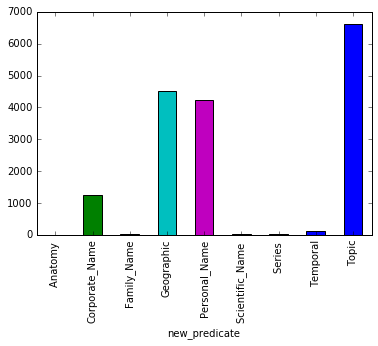

In [54]:
bySubj_counts.plot(kind='bar')

In [55]:
typesCount = df['new_predicate'].count()

In [56]:
typesCount

16827